# What is the prevalence of different chronic conditions of interest by year?

Chronic conditions:
- Hypertension
- Diabetes (excluding gestational diabetes)
- Cancers
- Musculoskeletal
- Cardiovascular
- Hyperlipidemia
- Asthma
- COPD
- Mental Health
- Sleep Disorders (sleep apnea, insomnia, narcolepsy) - Chronic Kidney Disease.


Calculate percentage of unique HCAs with a condition of interest. Use all HCAs including those who have not generated a claim as the denominator

## Notes about the included chronic conditions

The chronic conditions we have listed above do not correspond to what we have developed now. **Do you want to update this list on this question?** I will continue to answer this question with the conditions we have discussed and incorporated in the data.

Chronic conditions listed above but not included as categories in our data:
- Hypertension
- Hyperlipidemia

In [116]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [118]:
med = pd.read_csv('../../data/reshaped_med.csv')
enroll = pd.read_csv('../../data/enroll.csv')

### Total number of HCAs each year

In [119]:
years = enroll.groupby(['Incurred Year']).agg({'Member ID Encrypted': 'count', 'Member ID Encrypted': 'nunique'})
years.reset_index(level=0, inplace=True)
years.columns = ['year', 'total']
years.loc[:, 'year'] = ['2016', '2017', '2018']
years

,year,total
0,2016,18009
1,2017,19778
2,2018,17862


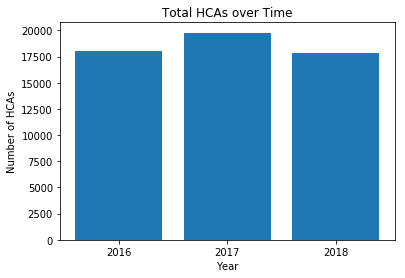

In [120]:
plt.bar(years['year'], years['total'])
plt.title('Total HCAs over Time')
plt.xlabel("Year")
plt.ylabel("Number of HCAs")
plt.show()

### Total number of claims each year

In [121]:
num_claims = med.groupby(['year']).size().reset_index(name='total')
num_claims.loc[:, 'year'] = ['2016', '2017', '2018']
num_claims

,year,total
0,2016,14336
1,2017,15369
2,2018,14507


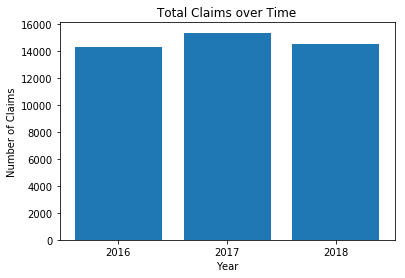

In [122]:
plt.bar(num_claims['year'], num_claims['total'])
plt.title('Total Claims over Time')
plt.xlabel("Year")
plt.ylabel("Number of Claims")
plt.show()

### Calculating percentage

In [123]:
asthma = med.groupby(['year'])['binary_asthma'].sum().reset_index(name ='asthma').asthma
bp = med.groupby(['year'])['binary_bp'].sum().reset_index(name ='bp').bp
cancer = med.groupby(['year'])['binary_cancer'].sum().reset_index(name = 'cancer').cancer
cardiovascular = med.groupby(['year'])['binary_cardiovascular'].sum().reset_index(name = 
                                                                                  'cardiovascular').cardiovascular
copd = med.groupby(['year'])['binary_copd'].sum().reset_index(name = 'copd').copd
diabetes = med.groupby(['year'])['binary_diabetes'].sum().reset_index(name = 'diabetes').diabetes
kidney = med.groupby(['year'])['binary_kidney'].sum().reset_index(name = 'kidney').kidney
obesity = med.groupby(['year'])['binary_obesity'].sum().reset_index(name = 'obesity').obesity
musculoskeletal = med.groupby(['year'])['binary_musculoskeletal'].sum().reset_index(name = 
                                                                                    'musculoskeletal').musculoskeletal
cholesterol = med.groupby(['year'])['binary_cholesterol'].sum().reset_index(name = 'cholesterol').cholesterol
mental_disorder = med.groupby(['year'])['binary_mental_disorder'].sum().reset_index(name = 
                                                                                    'mental_disorder').mental_disorder

Total claims for each chronic condition each year

In [124]:
totals_by_year = pd.concat([years, asthma, bp, cancer, cardiovascular, copd, diabetes, kidney, obesity, musculoskeletal, 
          cholesterol, mental_disorder], axis=1)
totals_by_year['chronic_total']= totals_by_year.iloc[:, 2:12].sum(axis=1)
totals_by_year

,year,total,asthma,bp,cancer,cardiovascular,copd,diabetes,kidney,obesity,musculoskeletal,cholesterol,mental_disorder,chronic_total
0,2016,18009,1224,4278,769,2637,881,3277,370,2216,1615,3546,687,20813
1,2017,19778,1278,4611,784,2890,906,3640,372,2479,1750,3726,610,22436
2,2018,17862,1133,4044,752,2825,763,3444,330,2386,1501,3434,547,20612


Percentages for each chronic condition each year

In [125]:
percentages = totals_by_year.iloc[:,2:13].div(totals_by_year['total'], axis=0) * 100
percentages.loc[:, 'year'] = ['2016', '2017', '2018']
percentages

,asthma,bp,cancer,cardiovascular,copd,diabetes,kidney,obesity,musculoskeletal,cholesterol,mental_disorder,year
0,6.796602,23.754789,4.270087,14.642679,4.891998,18.196457,2.054528,12.304959,8.967738,19.690155,3.814759,2016
1,6.461725,23.313783,3.964000,14.612195,4.580847,18.404288,1.880878,12.534129,8.848215,18.839114,3.084235,2017
2,6.343075,22.640242,4.210055,15.815698,4.271638,19.281156,1.847497,13.357967,8.403314,19.225171,3.062367,2018


In [126]:
print('Percentage for each chronic condition / total chronic condition each year')
percentages_chronic = totals_by_year.iloc[:,2:13].div(totals_by_year['chronic_total'], axis=0) * 100
percentages_chronic.loc[:, 'year'] = ['2016', '2017', '2018']
percentages_chronic

Percentage for each chronic condition / total chronic condition each year


,asthma,bp,cancer,cardiovascular,copd,diabetes,kidney,obesity,musculoskeletal,cholesterol,mental_disorder,year
0,5.880940,20.554461,3.694806,12.669966,4.232931,15.744967,1.777735,10.647192,7.759573,17.037429,3.300822,2016
1,5.696203,20.551792,3.494384,12.881084,4.038153,16.223926,1.658050,11.049207,7.799964,16.607238,2.718845,2017
2,5.496798,19.619639,3.648360,13.705608,3.701727,16.708713,1.601009,11.575781,7.282166,16.660198,2.653794,2018


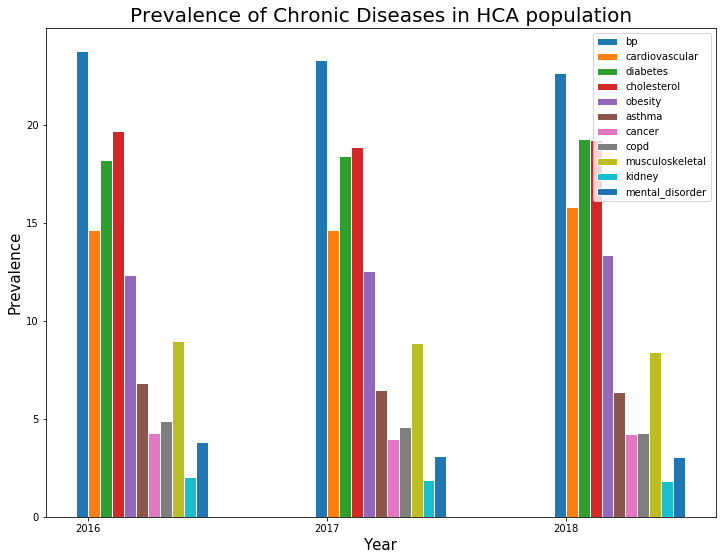

In [127]:
fig = plt.figure(figsize = (12, 9))

ind = np.arange(3) 
ind = np.arange(3) 
width = 0.05

plt.bar(ind, percentages['bp'], width, label = 'bp',edgecolor='white')
plt.bar(ind + width * 1, percentages['cardiovascular'], width, label = 'cardiovascular',edgecolor='white')
plt.bar(ind + width * 2, percentages['diabetes'], width, label = 'diabetes',edgecolor='white')
plt.bar(ind + width * 3, percentages['cholesterol'], width, label = 'cholesterol',edgecolor='white')
plt.bar(ind + width * 4, percentages['obesity'], width, label = 'obesity',edgecolor='white')
plt.bar(ind + width * 5, percentages['asthma'], width, label = 'asthma',edgecolor='white')
plt.bar(ind + width * 6, percentages['cancer'], width, label = 'cancer',edgecolor='white')
plt.bar(ind + width * 7, percentages['copd'], width, label = 'copd',edgecolor='white')
plt.bar(ind + width * 8, percentages['musculoskeletal'], width, label = 'musculoskeletal',edgecolor='white')
plt.bar(ind + width * 9, percentages['kidney'], width, label = 'kidney',edgecolor='white')
plt.bar(ind + width * 10, percentages['mental_disorder'], width, label = 'mental_disorder',edgecolor='white')

# labels
plt.title('Prevalence of Chronic Diseases in HCA population', size = 20)
plt.xlabel("Year", size = 15)
plt.ylabel("Prevalence", size = 15)
plt.legend(loc='best')
plt.xticks(ind + width / 2, ('2016', '2017', '2018'))


plt.show()

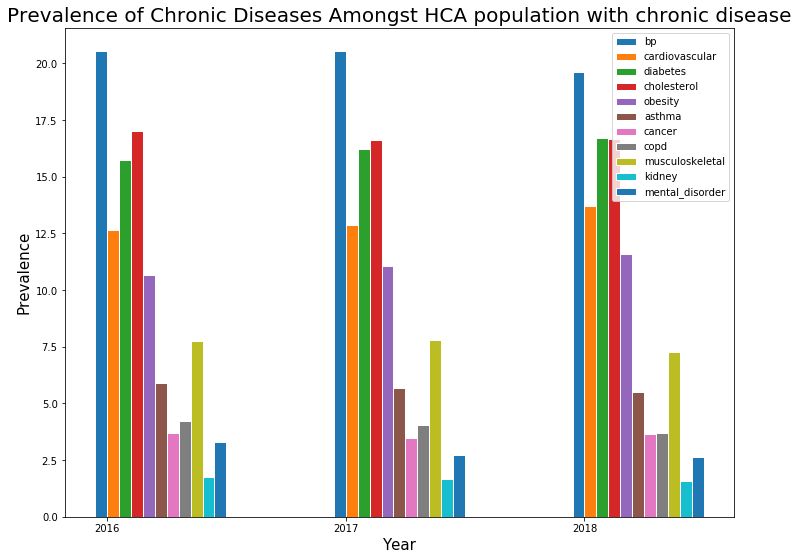

In [128]:
fig = plt.figure(figsize = (12, 9))

ind = np.arange(3) 
ind = np.arange(3) 
width = 0.05

plt.bar(ind, percentages_chronic['bp'], width, label = 'bp',edgecolor='white')
plt.bar(ind + width * 1, percentages_chronic['cardiovascular'], width, label = 'cardiovascular',edgecolor='white')
plt.bar(ind + width * 2, percentages_chronic['diabetes'], width, label = 'diabetes',edgecolor='white')
plt.bar(ind + width * 3, percentages_chronic['cholesterol'], width, label = 'cholesterol',edgecolor='white')
plt.bar(ind + width * 4, percentages_chronic['obesity'], width, label = 'obesity',edgecolor='white')
plt.bar(ind + width * 5, percentages_chronic['asthma'], width, label = 'asthma',edgecolor='white')
plt.bar(ind + width * 6, percentages_chronic['cancer'], width, label = 'cancer',edgecolor='white')
plt.bar(ind + width * 7, percentages_chronic['copd'], width, label = 'copd',edgecolor='white')
plt.bar(ind + width * 8, percentages_chronic['musculoskeletal'], width, label = 'musculoskeletal',edgecolor='white')
plt.bar(ind + width * 9, percentages_chronic['kidney'], width, label = 'kidney',edgecolor='white')
plt.bar(ind + width * 10, percentages_chronic['mental_disorder'], width, label = 'mental_disorder',edgecolor='white')

# labels
plt.title('Prevalence of Chronic Diseases Amongst HCA population with chronic disease', size = 20)
plt.xlabel("Year", size = 15)
plt.ylabel("Prevalence", size = 15)
plt.legend(loc='best')
plt.xticks(ind + width / 2, ('2016', '2017', '2018'))


plt.show()

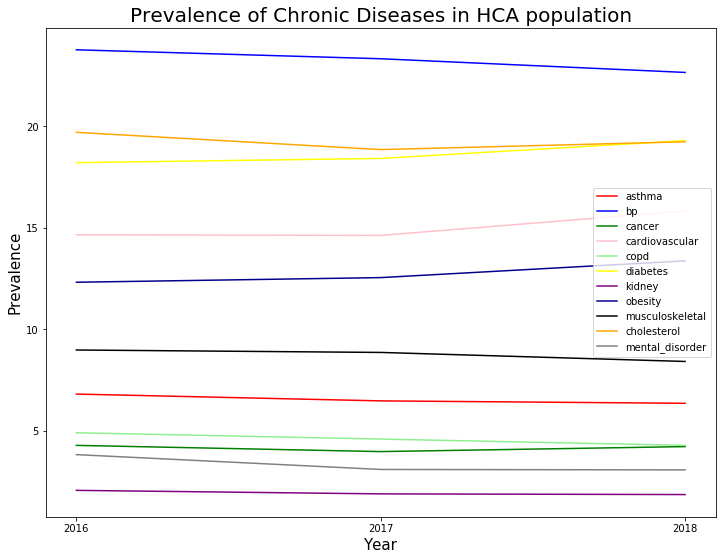

In [129]:
fig = plt.figure(figsize = (12, 9))

plt.plot(percentages['year'], percentages['asthma'], label = 'asthma', c = 'red')
plt.plot(percentages['year'], percentages['bp'], label = 'bp', c = 'blue')
plt.plot(percentages['year'], percentages['cancer'], label = 'cancer', c = 'green')
plt.plot(percentages['year'], percentages['cardiovascular'], label = 'cardiovascular', c = 'pink')
plt.plot(percentages['year'], percentages['copd'], label = 'copd', c = 'lightgreen')
plt.plot(percentages['year'], percentages['diabetes'], label = 'diabetes', c = 'yellow')
plt.plot(percentages['year'], percentages['kidney'], label = 'kidney', c = 'purple')
plt.plot(percentages['year'], percentages['obesity'], label = 'obesity', c = 'darkblue')
plt.plot(percentages['year'], percentages['musculoskeletal'], label = 'musculoskeletal', c = 'black')
plt.plot(percentages['year'], percentages['cholesterol'], label = 'cholesterol', c = 'orange')
plt.plot(percentages['year'], percentages['mental_disorder'], label = 'mental_disorder', c = 'gray')

# labels
plt.title('Prevalence of Chronic Diseases in HCA population', size = 20)
plt.xlabel("Year", size = 15)
plt.ylabel("Prevalence", size = 15)
plt.legend(loc='best')


plt.show()

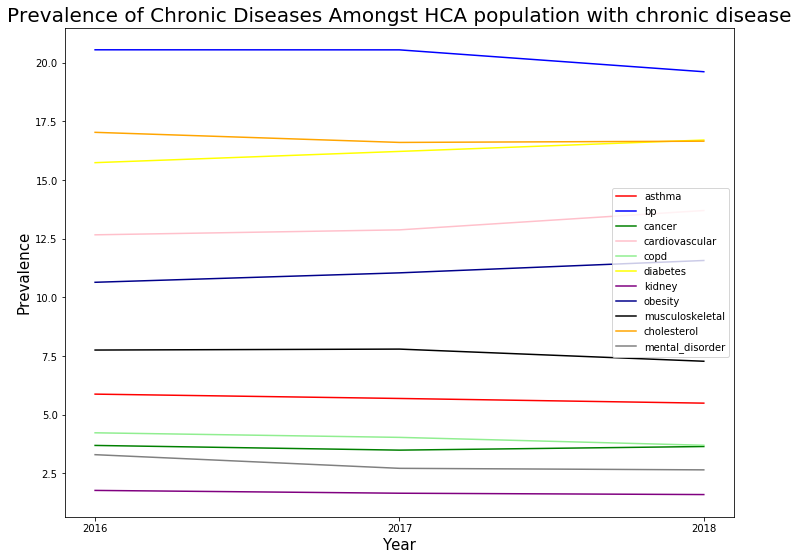

In [130]:
fig = plt.figure(figsize = (12, 9))

plt.plot(percentages_chronic['year'], percentages_chronic['asthma'], label = 'asthma', c = 'red')
plt.plot(percentages_chronic['year'], percentages_chronic['bp'], label = 'bp', c = 'blue')
plt.plot(percentages_chronic['year'], percentages_chronic['cancer'], label = 'cancer', c = 'green')
plt.plot(percentages_chronic['year'], percentages_chronic['cardiovascular'], label = 'cardiovascular', c = 'pink')
plt.plot(percentages_chronic['year'], percentages_chronic['copd'], label = 'copd', c = 'lightgreen')
plt.plot(percentages_chronic['year'], percentages_chronic['diabetes'], label = 'diabetes', c = 'yellow')
plt.plot(percentages_chronic['year'], percentages_chronic['kidney'], label = 'kidney', c = 'purple')
plt.plot(percentages_chronic['year'], percentages_chronic['obesity'], label = 'obesity', c = 'darkblue')
plt.plot(percentages_chronic['year'], percentages_chronic['musculoskeletal'], label = 'musculoskeletal', c = 'black')
plt.plot(percentages_chronic['year'], percentages_chronic['cholesterol'], label = 'cholesterol', c = 'orange')
plt.plot(percentages_chronic['year'], percentages_chronic['mental_disorder'], label = 'mental_disorder', c = 'gray')

# labels
plt.title('Prevalence of Chronic Diseases Amongst HCA population with chronic disease', size = 20)
plt.xlabel("Year", size = 15)
plt.ylabel("Prevalence", size = 15)
plt.legend(loc='best')


plt.show()

In [131]:
def disease_graph(disease): 
    plt.bar(percentages['year'], percentages[disease], align='center', color='tab:blue')
    plt.title('Prevalence of Asthma in HCA population')
    plt.xlabel("Year")
    plt.ylabel("Prevalence")
    plt.show()

    plt.bar(percentages_chronic['year'], percentages_chronic[disease], align='center', color='tab:blue')
    plt.title('Prevalence of Asthma HCA population with Chronic Diseases')
    plt.xlabel("Year")
    plt.ylabel("Prevalence")
    plt.show()
    return;

### asthma

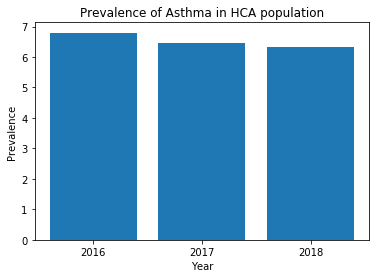

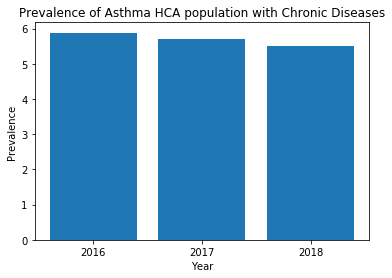

In [132]:
disease_graph('asthma')

### bp

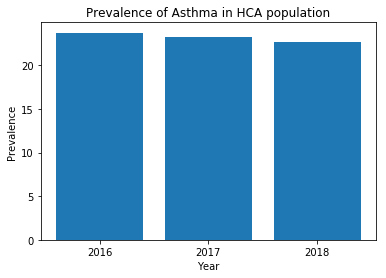

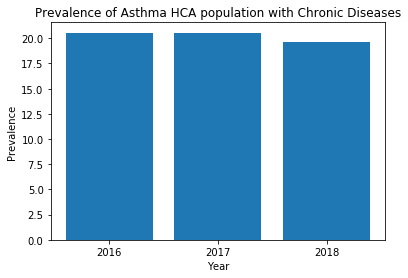

In [133]:
disease_graph('bp')

### cancer

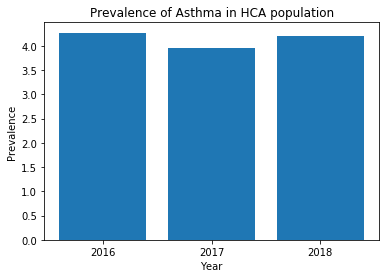

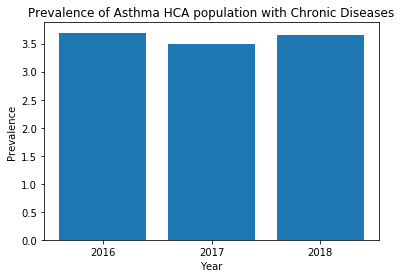

In [134]:
disease_graph('cancer')

### cardiovascular

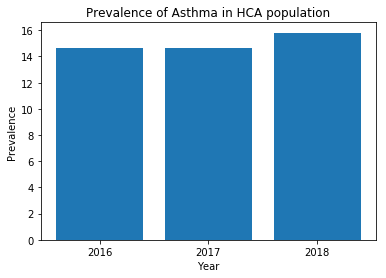

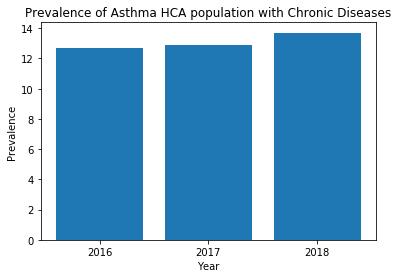

In [135]:
disease_graph('cardiovascular')

### copd

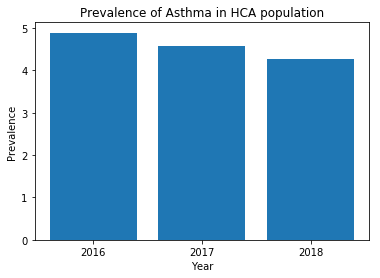

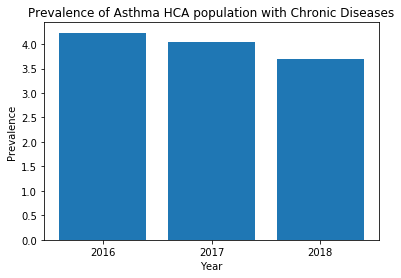

In [136]:
disease_graph('copd')

### diabetes

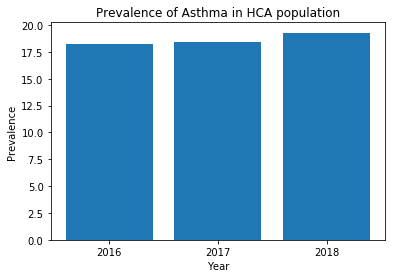

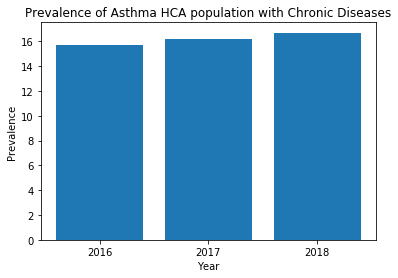

In [137]:
disease_graph('diabetes')

### kidney

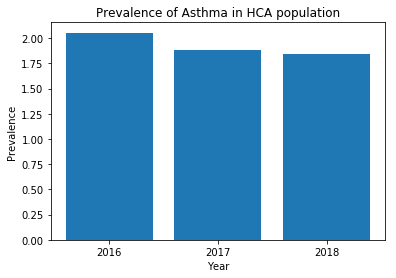

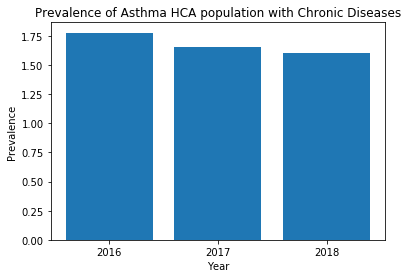

In [138]:
disease_graph('kidney')

### obesity

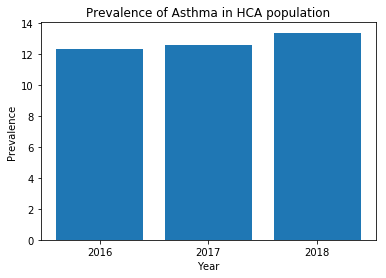

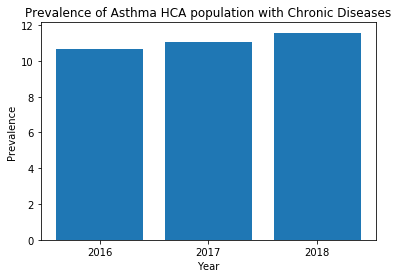

In [139]:
disease_graph('obesity')

### musculoskeletal

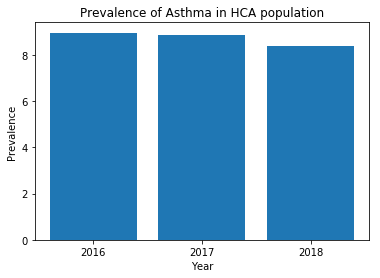

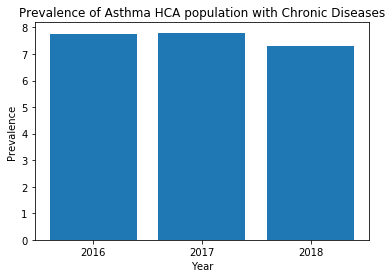

In [140]:
disease_graph('musculoskeletal')

### cholesterol

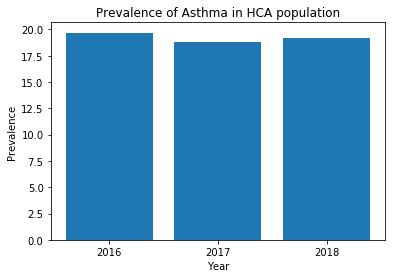

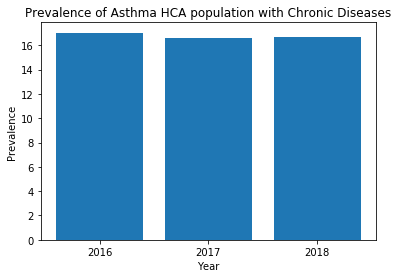

In [141]:
disease_graph('cholesterol')

### mental_disorder

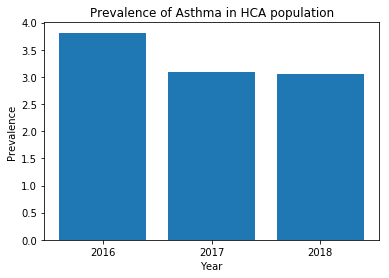

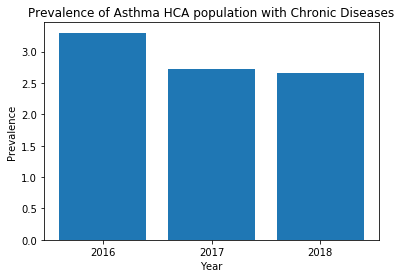

In [142]:
disease_graph('mental_disorder')